# TITANIC DATA SET DISCOVERY

<img src='images/titanic-movie-boat.jpg'>

#### Is the story a young poor guy

<img src='images/titanic_jackb.jpg'>

#### and a rich girl.

<img src='images/kate.jpg' style="width: 500px; height: 300px;">

####  And he died because she said there was no room left on the floating piece of wood (a.ka. selfish).

<img src='images/dead.jpg'>



Fortunately, we have the ship's [manifest](data/train.csv) of nearly every single passenger. But using standard python libraries to peak and poke that dataset is kinda of a miserable experience. Fortunately, we have pandas. 

http://pandas.pydata.org/

Pandas provides an abstraction to load in data, manipulate it, and export your changes. 

In [2]:
from __future__ import division 

In [3]:
import math

In [5]:
from matplotlib import pyplot as plt

In [7]:
plt.style.use('ggplot')

In [8]:
import pandas as pd

In [11]:
import numpy as np

In [12]:
%matplotlib inline

In [13]:
df = pd.read_csv("data/train.csv")

In [14]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [16]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [19]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [20]:
df.shape

(891, 12)

In [21]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [25]:
df["Name"]

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
5                                       Moran, Mr. James
6                                McCarthy, Mr. Timothy J
7                         Palsson, Master. Gosta Leonard
8      Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                    Nasser, Mrs. Nicholas (Adele Achem)
10                       Sandstrom, Miss. Marguerite Rut
11                              Bonnell, Miss. Elizabeth
12                        Saundercock, Mr. William Henry
13                           Andersson, Mr. Anders Johan
14                  Vestrom, Miss. Hulda Amanda Adolfina
15                      Hewlett, Mrs. (Mary D Kingcome) 
16                                  Rice, Master. Eugene
17                          Wil

In [26]:
my_famous_passenger = df[df["Name"] == "Guggenheim, Mr. Benjamin"]

In [28]:
print(my_famous_passenger)

     PassengerId  Survived  Pclass                      Name   Sex   Age  \
789          790         0       1  Guggenheim, Mr. Benjamin  male  46.0   

     SibSp  Parch    Ticket  Fare    Cabin Embarked  
789      0      0  PC 17593  79.2  B82 B84        C  


In [29]:
df["Age"].mean()

29.69911764705882

In [30]:
df["Fare"].mean()

32.2042079685746

In [31]:
df["Fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [32]:
my_rich_passenger = df[df["Fare"] == 512.329200]

In [33]:
print(my_rich_passenger)

     PassengerId  Survived  Pclass                                Name  \
258          259         1       1                    Ward, Miss. Anna   
679          680         1       1  Cardeza, Mr. Thomas Drake Martinez   
737          738         1       1              Lesurer, Mr. Gustave J   

        Sex   Age  SibSp  Parch    Ticket      Fare        Cabin Embarked  
258  female  35.0      0      0  PC 17755  512.3292          NaN        C  
679    male  36.0      0      1  PC 17755  512.3292  B51 B53 B55        C  
737    male  35.0      0      0  PC 17755  512.3292         B101        C  


In [36]:
cols = list(df.columns.values)

In [37]:
print(cols)

['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [38]:
cols[0]

'PassengerId'

In [40]:
cols[-1]

'Embarked'

In [42]:
cols = ['Survived', 'PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']

In [43]:
print(cols)

['Survived', 'PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [44]:
new_df = df[cols]
new_df.head()

,Survived,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [49]:
new_df = df[["Sex", "Age"]]
new_df.head()

,Sex,Age
0,male,22.0
1,female,38.0
2,female,26.0
3,female,35.0
4,male,35.0


In [52]:
df_of_women = df[df["Sex"] == "female"]

In [53]:
df_of_men = df[df["Sex"] == "male"]

In [54]:
df_of_women.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [58]:
#Exercise
#Create three data frames. Capture them by passenger class 'Pclass'
# There are three of them. Then figure out the size of each one.

In [59]:
df_first_class = df[df["Pclass"] == 1]

In [60]:
df_second_class = df[df["Pclass"] == 2]

In [61]:
df_third_class = df[df["Pclass"] == 3]df[]

In [62]:
df_first_class.shape

(216, 12)

In [63]:
df_first_class.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,216.000000,216.000000,216.0,186.000000,216.000000,216.000000,216.000000
mean,461.597222,0.629630,1.0,38.233441,0.416667,0.356481,84.154687
std,246.737616,0.484026,0.0,14.802856,0.611898,0.693997,78.380373
min,2.000000,0.000000,1.0,0.920000,0.000000,0.000000,0.000000
25%,270.750000,0.000000,1.0,27.000000,0.000000,0.000000,30.923950
50%,472.000000,1.000000,1.0,37.000000,0.000000,0.000000,60.287500
75%,670.500000,1.000000,1.0,49.000000,1.000000,0.000000,93.500000
max,890.000000,1.000000,1.0,80.000000,3.000000,4.000000,512.329200


In [64]:
df_second_class.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,184.000000,184.000000,184.0,173.000000,184.000000,184.000000,184.000000
mean,445.956522,0.472826,2.0,29.877630,0.402174,0.380435,20.662183
std,250.852161,0.500623,0.0,14.001077,0.601633,0.690963,13.417399
min,10.000000,0.000000,2.0,0.670000,0.000000,0.000000,0.000000
25%,234.500000,0.000000,2.0,23.000000,0.000000,0.000000,13.000000
50%,435.500000,0.000000,2.0,29.000000,0.000000,0.000000,14.250000
75%,668.000000,1.000000,2.0,36.000000,1.000000,1.000000,26.000000
max,887.000000,1.000000,2.0,70.000000,3.000000,3.000000,73.500000


In [65]:
df_third_class.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,491.000000,491.000000,491.0,355.000000,491.000000,491.000000,491.000000
mean,439.154786,0.242363,3.0,25.140620,0.615071,0.393075,13.675550
std,264.441453,0.428949,0.0,12.495398,1.374883,0.888861,11.778142
min,1.000000,0.000000,3.0,0.420000,0.000000,0.000000,0.000000
25%,200.000000,0.000000,3.0,18.000000,0.000000,0.000000,7.750000
50%,432.000000,0.000000,3.0,24.000000,0.000000,0.000000,8.050000
75%,666.500000,0.000000,3.0,32.000000,1.000000,0.000000,15.500000
max,891.000000,1.000000,3.0,74.000000,8.000000,6.000000,69.550000


In [66]:
df_third_class["PassengerId"].describe()

count    491.000000
mean     439.154786
std      264.441453
min        1.000000
25%      200.000000
50%      432.000000
75%      666.500000
max      891.000000
Name: PassengerId, dtype: float64

In [67]:
df["FamilySize"] = df['SibSp'] + df["Parch"]

In [68]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


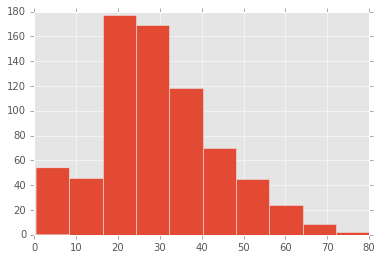

In [69]:
df["Age"].hist()

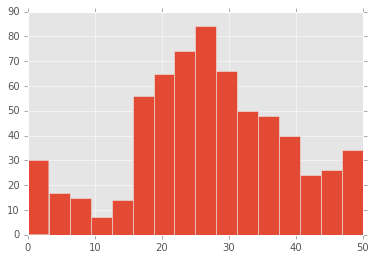

In [71]:
df["Age"].dropna().hist(bins=16, range=(0,50))

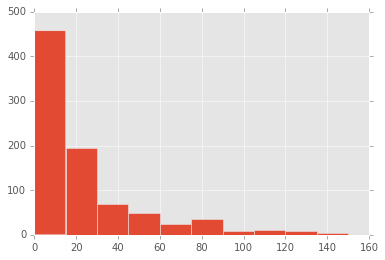

In [75]:
df["Fare"].hist(range=(0,150))

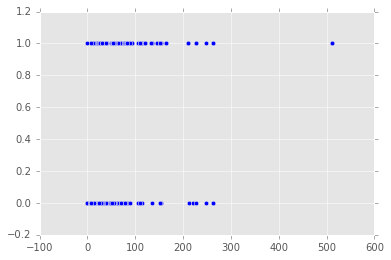

In [76]:
plt.scatter(df["Fare"], df["Survived"])

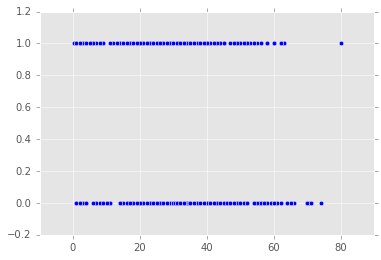

In [77]:
plt.scatter(df["Age"], df["Survived"])

In [78]:
plt.scatter?
#Change scale, labels, range
#TODO

In [92]:
d ={'one':np.random.rand(10),
    'two': np.random.rand(10)}
print(d)

{'two': array([ 0.15982632,  0.95080416,  0.70078275,  0.59271496,  0.95174382,
        0.84655393,  0.09595756,  0.63669947,  0.18645267,  0.35678547]), 'one': array([ 0.64534502,  0.1247966 ,  0.60607941,  0.43935361,  0.52780009,
        0.86085276,  0.4616704 ,  0.25655037,  0.13613834,  0.06472422])}


In [93]:
df_scrap = pd.DataFrame(d)

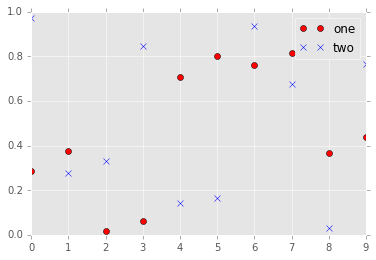

In [88]:
df_scrap.plot(style=["ro", "bx"])

In [95]:
import statsmodels.api as sm

In [96]:
import pylab as pl

In [97]:
#Logistic Regression

print(df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'FamilySize'],
      dtype='object')


In [98]:
new_df = df

In [99]:
def gender_to_numeric(gender):
    if gender == "male":
        return 0
    else:
        return 1

In [100]:
new_df["Sex"] = new_df["Sex"].apply(gender_to_numeric)

In [113]:
new_df = new_df[["Survived", "Age", "Sex", "Pclass"]]
new_df = new_df.dropna()

In [102]:
new_df.head()

,Survived,Age,Sex,Pclass
0,0,22.0,0,3
1,1,38.0,1,1
2,1,26.0,1,3
3,1,35.0,1,1
4,0,35.0,0,3


In [110]:
train_cols = new_df.columns[1:]

In [118]:
train_cols

Index(['Age', 'Sex', 'Pclass'], dtype='object')

In [119]:
logit = sm.Logit(new_df["Survived"], new_df[train_cols])

In [120]:
#Fit the model
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.476553
         Iterations 6


In [121]:

print(result.summary())

                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  714
Model:                          Logit   Df Residuals:                      711
Method:                           MLE   Df Model:                            2
Date:                Sun, 12 Jun 2016   Pseudo R-squ.:                  0.2944
Time:                        10:43:29   Log-Likelihood:                -340.26
converged:                       True   LL-Null:                       -482.26
                                        LLR p-value:                 2.141e-62
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Age           -0.0035      0.004     -0.777      0.437        -0.012     0.005
Sex            2.6431      0.193     13.710      0.000         2.265     3.021
Pclass        -0.6535      0.072     -9.108      0.0

In [122]:
print(result.conf_int())

               0         1
Age    -0.012195  0.005269
Sex     2.265226  3.020908
Pclass -0.794116 -0.512863
